In [2]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
# read csv file
df = pd.read_csv('spot_2 (2).csv')


In [3]:
# only swaps
df = df[df['event_name'] == 'Swap']

# initiators who have PnL
d = df['trx_initiator'].value_counts()

In [67]:
data = df[['block_timestamp','trx_initiator', 'token0_in','token1_in', 'token0_out', 'token1_out']].sort_values(by=["block_timestamp"], ascending = False)

In [69]:
data[df['trx_initiator'] == '0x55dcad916750c19c4ec69d65ff0317767b36ce90']

C:\Users\default.LAPTOP-ACER\AppData\Local\Temp\ipykernel_3380\1725167642.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[df['trx_initiator'] == '0x55dcad916750c19c4ec69d65ff0317767b36ce90']


,block_timestamp,trx_initiator,token0_in,token1_in,token0_out,token1_out
2184,2023-02-14 23:40:23.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,3500.479210,3968.579014,NaN
2170,2023-02-12 21:55:35.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,1383.085589,1568.807627,NaN
1566,2023-01-23 15:23:59.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,1488.653737,1684.578358,NaN
1482,2023-01-20 22:34:11.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,490.000000,553.503881,NaN
1447,2023-01-19 11:49:35.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,1978.653737,2269.186063,NaN
1363,2023-01-18 14:16:47.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,505.344700,585.326199,NaN
1296,2023-01-14 13:58:59.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,504.000000,588.049568,NaN
1295,2023-01-14 11:30:23.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,504.000000,588.128890,NaN
1293,2023-01-13 22:39:47.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,510.171181,595.310525,NaN
1278,2023-01-13 14:46:35.000,0x55dcad916750c19c4ec69d65ff0317767b36ce90,NaN,510.171181,595.775897,NaN


In [87]:
import numpy as np
pnl_dict = {}
time = []
for i in d.index:
    time.append(data[data['trx_initiator'] == i]['block_timestamp'])
    t0_out = 0
    t1_in = 0
    t0_in = 0
    t1_out = 0
    t1 = 0
    t2 = 0
    for index, row in data[data['trx_initiator'] == i].iterrows():
        if np.isnan(row[3]):
            t1_out+= row[5]
            t0_in+= row[2]
            t2 = t0_in - t1_out
        else:
            t1_in+= row[3]
            t0_out+= row[4]
            t1 = t1_in - t0_out
    pnl_dict[i] = [t1 + t2]
pnl_dict

{'0x55dcad916750c19c4ec69d65ff0317767b36ce90': [-2551.2960512200007],
 '0x5db92b4157491c445a1a530659f54c8bcc7126ed': [213.36090900099953],
 '0xfa52387d626109c1b2c103ec85f8f8124a8d31b6': [298.75895400000445],
 '0xbff392cd252a3c337ef29cebd89ee5b3b6f9f594': [166.2216507420003],
 '0x970048ba62de979f81eb93da355bc64f94c33410': [-1528.202519124001],
 '0x27d876a74b9a4b58b90c638da09fe0c358c38975': [2083.1785844830083],
 '0x988de50d0b424500a81d5985118750f5401857f9': [10.204043999990972],
 '0xf89ebfa55385f1aef401d5dc5ee761569e45874e': [-661.6541263249992],
 '0x995b541b832f54743f6a207ec548c7370e538c87': [-907.7821445739987],
 '0xc18ee6bf19aeccbc5985f68a4f10f4cb2d2bcb51': [-1219.6824062020025],
 '0xe6c4293235d11c9d241d6d204eb366f0afdbe3fa': [-68.83037934599997],
 '0xf3762c7fa90e3df19c4e21af3df59077666fce90': [4.817026999999143],
 '0x5c6428181b9b34df8c1f2af7718f03cacc79d183': [-842.368051045],
 '0x51382c7e0ff4dd26683b3356f4fd1320f9cf3327': [446.7138565480018],
 '0x9595eeaf82907ce461842e533427336d274

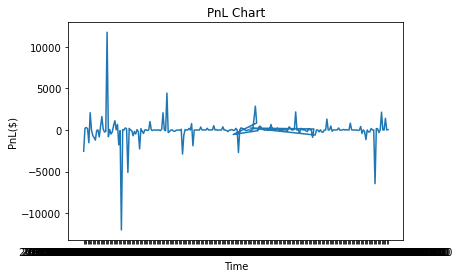

In [100]:
t = []
for i in time:
    t.append(i.iloc[0])
plt.plot(t,pnl_dict.values())
plt.ylabel('PnL($)')
plt.xlabel('Time')
plt.title('PnL Chart')
plt.show()